In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir(r'C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Store data, labels in the list

In [3]:
data=[]
labels=[]
#we have 43 classes
classes=43
cur_path=os.getcwd()

In [4]:
cur_path

'C:\\Users\\shiva\\Desktop\\KAMLESH\\Traffic-Signal-Classification'

 ## Preprocessing the Image

In [8]:
import os
import numpy as np
from PIL import Image

data=[]
labels=[]
classes=10  # Adjust this based on the actual number of class folders

cur_path=r"C:\Users\shiva\Desktop\KAMLESH\Train"

for i in range(classes):
    path=os.path.join(cur_path,str(i))  # Using the provided path
    if not os.path.exists(path):  # Check if the folder exists before accessing it
        print(f"Folder not found: {path}")
        continue
    
    images=os.listdir(path)
    for a in images:
        try:
            image=Image.open(os.path.join(path,a))  # Use os.path.join to handle slashes
            image=image.resize((30,30))
            image=np.array(image)
            data.append(image)   
            labels.append(i)    
        except Exception as e:
            print(f"Error loading image {a}: {e}")


Folder not found: C:\Users\shiva\Desktop\KAMLESH\Train\3
Folder not found: C:\Users\shiva\Desktop\KAMLESH\Train\4
Folder not found: C:\Users\shiva\Desktop\KAMLESH\Train\5
Folder not found: C:\Users\shiva\Desktop\KAMLESH\Train\6
Folder not found: C:\Users\shiva\Desktop\KAMLESH\Train\7
Folder not found: C:\Users\shiva\Desktop\KAMLESH\Train\8
Folder not found: C:\Users\shiva\Desktop\KAMLESH\Train\9


## Converting lists into numpy arrays

In [9]:
data=np.array(data)
labels=np.array(labels)

## Save data & labels for further use

In [32]:
# os.mkdir('Training')
np.save(r'C:\Users\shiva\Desktop\KAMLESH\training\data',data)
np.save(r'C:\Users\shiva\Desktop\KAMLESH\training\labels',labels)

In [33]:
data=np.load(r'C:\Users\shiva\Desktop\KAMLESH\training\data.npy')
labels=np.load(r'C:\Users\shiva\Desktop\KAMLESH\training\labels.npy')

- Since processing the image again and again takes time so we save the image data for further reference

In [34]:
print(data.shape,labels.shape)

(4680, 30, 30, 3) (4680, 30, 30, 3)


## Splitting the data for Training and Testing

In [35]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=0)

In [36]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3744, 30, 30, 3) (936, 30, 30, 3) (3744, 30, 30, 3) (936, 30, 30, 3)


In [37]:
y_train

array([[[[ 43,  37,  34],
         [ 40,  35,  33],
         [ 36,  31,  28],
         ...,
         [ 37,  33,  30],
         [ 37,  33,  35],
         [ 45,  39,  47]],

        [[ 36,  32,  28],
         [ 35,  31,  28],
         [ 36,  31,  28],
         ...,
         [ 38,  34,  29],
         [ 37,  33,  37],
         [ 49,  43,  57]],

        [[ 35,  32,  29],
         [ 36,  32,  29],
         [ 34,  29,  26],
         ...,
         [ 39,  35,  30],
         [ 39,  34,  34],
         [ 54,  47,  52]],

        ...,

        [[ 46,  46,  38],
         [ 47,  44,  33],
         [ 40,  34,  27],
         ...,
         [ 65,  57,  47],
         [ 58,  43,  33],
         [ 55,  43,  33]],

        [[ 42,  40,  31],
         [ 45,  41,  31],
         [ 36,  29,  23],
         ...,
         [ 48,  42,  31],
         [ 45,  37,  27],
         [ 48,  40,  30]],

        [[ 43,  39,  32],
         [ 44,  38,  30],
         [ 36,  28,  23],
         ...,
         [ 34,  30,  21],
        

## Convert labels to onehot encoding

In [40]:
y_train=to_categorical(y_train,256)
y_test=to_categorical(y_test,256)

In [41]:
y_train

array([[[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         ...,

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]],


        [[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ...

## Now it's time to build the model

In [42]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5), activation='relu',input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32,kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
#Since we have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

c:\Users\shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
#COmpilation of the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#for better accuracy we can change the optimizer and loss

### Train the model

In [53]:
epochs=20
history=model.fit(x_train,y_train,batch_size=4, epochs=epochs, validation_data=(x_test,y_test))

Epoch 1/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 71s 6ms/step - accuracy: 0.2915 - loss: 1.8921 - val_accuracy: 0.4941 - val_loss: 1.4163
Epoch 2/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 87s 7ms/step - accuracy: 0.4737 - loss: 1.4572 - val_accuracy: 0.5254 - val_loss: 1.3130
Epoch 3/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 48s 4ms/step - accuracy: 0.5188 - loss: 1.3531 - val_accuracy: 0.5694 - val_loss: 1.2170
Epoch 4/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - accuracy: 0.5402 - loss: 1.2988 - val_accuracy: 0.5762 - val_loss: 1.2046
Epoch 5/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step - accuracy: 0.5532 - loss: 1.2624 - val_accuracy: 0.5557 - val_loss: 1.2431
Epoch 6/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 55s 4ms/step - accuracy: 0.5610 - loss: 1.2420 - val_accuracy: 0.5937 - val_loss: 1.1606
Epoch 7/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 56s 4ms/step - accuracy: 0.5666 - loss: 1.2153 - val_accuracy: 0.5815 - val_loss: 1.2023
Epoch 8/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - accuracy: 

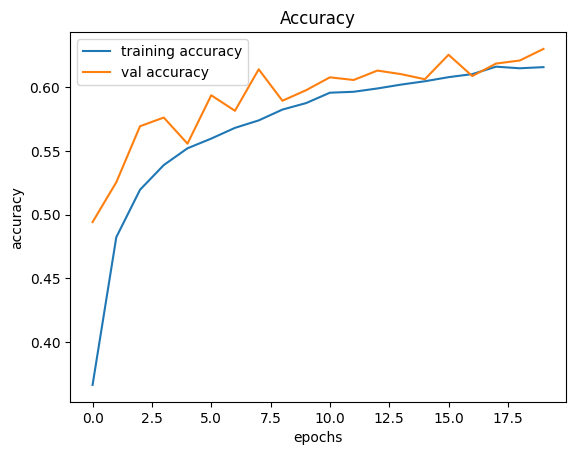

In [54]:
#Accuracy
plt.figure(0)
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Let's do testing on Test Data

In [82]:
import pandas as pd
import numpy as np
from PIL import Image
import os

def testing(Test):
    y_test = pd.read_csv(Test)
    label = y_test['ClassId'].values
    imgs = y_test["Path"].values

    # Base path should explicitly point to the Test folder
    base_path = os.path.join(os.path.dirname(Test), "Test")

    # Ensure correct absolute paths
    imgs = [os.path.join(base_path, os.path.basename(img)) for img in imgs]

    data = []
    for img in imgs:
        if os.path.exists(img):  # Check if file exists
            image = Image.open(img)
            image = image.resize((30,30))
            data.append(np.array(image))
        else:
            print(f"❌ File not found: {img}")

    x_test = np.array(data)
    return x_test, label

x_test, label = testing(r'C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test.csv')


❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00000.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00001.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00002.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00003.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00004.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00005.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00006.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00007.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00008.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00009.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Sig

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import os

def testing(Test):
    y_test=pd.read_csv(Test)
    label=y_test['ClassId'].values
    imgs=y_test["Path"].values

    # Get the base directory of the CSV file
    base_path = os.path.dirname(Test)

    # Convert relative paths to absolute paths
    imgs=[os.path.join(base_path, img) for img in imgs]

    data=[]
    for img in imgs:
        if os.path.exists(img):  # Check if the file exists
            image=Image.open(img)
            image=image.resize((30,30))
            data.append(np.array(image))
        else:
            print(f"❌ File not found: {img}")

    x_test=np.array(data)
    return x_test, label

x_test, label = testing(r'C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test.csv')


❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00000.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00001.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00002.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00003.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00004.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00005.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00006.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00007.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00008.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00009.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Sig

In [80]:
x_test, label=testing(r'C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test.csv')

❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00000.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00001.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00002.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00003.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00004.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00005.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00006.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00007.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00008.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Signal-Classification\Test\00009.png
❌ File not found: C:\Users\shiva\Desktop\KAMLESH\Traffic-Sig

In [70]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([5, 1, 8, ..., 5, 4, 7], dtype=int64)

## Accuracy with the test data

In [68]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label,y_pred))

NameError: name 'label' is not defined

### Save the model

In [90]:
model.save('E:/FTE/Projects/DL/Traffic_Signal_Recognition/Training/TRS.keras')

### Load the Model

In [91]:
import os
os.chdir(r'E:\FTE\Projects\DL\Traffic_Signal_Recognition')
from keras.models import load_model
model= load_model('E:/FTE/Projects/DL/Traffic_Signal_Recognition/Training/TRS.h5')

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image

# Dictionary of traffic signs
classes = {0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 
           3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 
           6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 
           9: 'No passing', 10: 'No passing veh over 3.5 tons', 11: 'Right-of-way at intersection', 
           12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 
           16: 'Veh > 3.5 tons prohibited', 17: 'No entry', 18: 'General caution', 
           19: 'Dangerous curve left', 20: 'Dangerous curve right', 21: 'Double curve', 
           22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 
           25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 
           29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 
           32: 'End speed + passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 
           35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight or left', 
           38: 'Keep right', 39: 'Keep left', 40: 'Roundabout mandatory', 
           41: 'End of no passing', 42: 'End no passing veh > 3.5 tons'}

def image_processing(img_path):
    # Load the model
    model = load_model('E:/FTE/Projects/DL/Traffic_Signal_Recognition/Training/TRS.h5')
    
    # Open, resize, and preprocess the image
    image = Image.open(img_path)
    image = image.resize((30, 30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    
    # Make prediction
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    # Get the class name from the dictionary
    sign = classes[predicted_class]
    
    # Display the image and the predicted class
    plt.imshow(Image.open(img_path))
    plt.title(f"Predicted traffic sign is: {sign}")
    plt.axis('off')
    plt.show()

# Call the function with the test image path
image_processing(r'E:/FTE/Projects/DL/Traffic_Signal_Recognition/Test/00214.png')


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'E:/FTE/Projects/DL/Traffic_Signal_Recognition/Training/TRS.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)